
# MLG382 GROUP PROJECT  [100 Marks] 
**Lecturer: _K. Igwe_**


# Your task is to predict *median house values* in Western cape, given a number of features from the districts 


The first question to ask before building a model is what exactly the business objective is. How does the client expect to use and benefit from the model? The objective is important in determining how you will frame the problem, the algorithms to select, the performance measure to use for your model evaluation, and the level of effort you will spend tweaking your model.

In this project, you should assume that your model’s output (a prediction of a district’s median housing price) will be fed to
another Machine Learning system along with many other determinats to better understand the risk of investing in a given area of the Western Cape. The data (home.csv) are provided alonside this notebook. 

This checklist can guide you through the projects.
1. Frame the problem and look at the big picture (done for you).
2. Get the data (made available for you).
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
5. Explore many different models and shortlist the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.

### Aim
- Lecturers aim: To expose you to practical applications of ML. 
- Your aim:  to predict median house values in Western cape, given a number of features from the province. 

### Skills Tested
- Basic Python Programming
- EDA
- Use of sklearn Library
- choosing the right model and Building a classification Model
- Understanding and using different evaluation techniques
- Reporting 

### Instructions and Directions
1. _**your code here**_  or  _**your answer here**_ need to be deleted and replaced with your code or answer
2. You may use more than one cell to answer a question
3. Ensure that you include appropriate comment
4. If your code requires special instruction or dependencies to run, please provide these in your submission 

### NOTE: 80% is for meeting requirement, 20% will be awarded based on extra work. I have provided some guide where I enticipate that you may need extra help.

# Contributors:
#### Werner Pretorius
#### Zandrei Kleynhans
#### Lourens Geyser
#### De Wet Kirsten
#### Gideon Rossouw

## RUBRIC

1. Frame the problem and look at the big picture (done for you).
2. Get the data (made available for you).
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
5. Explore many different models (at least 3) and shortlist the best ones.
6. Fine-tune your models.
7. Present your solution.

##  Frame the problem and look at the big picture (done for you).

In [43]:
# Nothing Required here. Good Luck!

# Imports

In [44]:
# Maths Stuff
import pandas as pd
import numpy as np
from scipy import stats as st

# Plotting Stuff
from matplotlib import pyplot as plt
import seaborn as sns

# Preprocessing Stuff
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression, RFE

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Performance Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score

# Model Evaluation
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold

# Pipelining
from sklearn.pipeline import Pipeline

# To calculate class weights => combat label imbalance
from sklearn.utils.class_weight import compute_class_weight

## Get the data (made available for you) [0].

#### First things first, let's import the CSV to get a feel of our dataset

In [45]:
#loading the dataset
home_data = pd.read_csv("home.csv")

# Gives description of the statistical properties of the dataset 
print(home_data.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

## Explore the data to gain insights [10] BONUS [5]

#### hints!
- check for correlations: features with the label. And features with one another
- use graphs to illustrate similarities and differences as you deem neccessary
- NOTE: Features with non-linear relationships will have little or no correlation but may still be very instrumental in your predictions
- Test combinations of features (for example, new feature = old_feature1/old_feature2 )

#### Imputation of NaN's and Duplicates

Here we can nicely see where all the NaN Values are located

In [46]:
null_percentage = home_data.isnull().sum()/len(home_data)*100
print(null_percentage)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


Firstly, the *__total_bedrooms__* column seems to be the only one to contain Null values. The imputation of the nulls are not being ignored. Instead, for now,  they will be replaced by the average value in the row, for now. The column will not survive the first filter, i.e. the _feature to feature correlation_ test. It is merely being kept for illustrative purposes. It will later be removed as a result of it being a redundant feature.

Now, to remove the duplicates:

In [47]:
home_data.drop_duplicates(inplace=True)

#### A bit of One-Hot Encoding on Ocean Proximity => Because our machines speak in 1's and 0's, not words.

The manner in which to approach the transformation of the sole categorical feature in the dataset was carefully considered. 

Firstly, off the eye, one might assume that the values of the _ocean_priximity_ feature are ordinally related. However, *_they are not_*. Instead, they can be safely ruled out a Nominal, as ther have no direct or measurable relation to one another.

Secondly, since the feature contains a mere five different categories, and it is nominal, the final decision was made to make use of One-Hot Encoding to tranform it to numerical.

In [48]:
print(home_data["ocean_proximity"].value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [49]:
# use dummies to create one new column for every category => creates DataFrame
ohe_prox = pd.get_dummies(home_data["ocean_proximity"])

# add to existing dataset
home_data = home_data.join(ohe_prox).drop(columns=["ocean_proximity"])

#### Dealing with Outliers

Two methods of dealing with outliers were considered. But to undertake either of them, the quartiles, as well as the interquartile range needed to be calculated.

In [50]:
# # Get first quartile
# q1 = np.percentile(home_data[column], 25)
    
# # Get third quartile
# q3 = np.percentile(home_data[column], 75)

# # Calculate IQR
# iqr = p2 - p1

The first method that was considered included removing all rows that contained outliers which would be done as follows:

In [51]:
# home_data = home_data[((home_data < (q1 - 1.5 * iqr)) | (home_data > (q3 + 1.5 * iqr))).any(axis=1)]

This method was, however, discarded on the grounds of the fact that due to the multi-dimensional nature of the dataset, following this route could possibly discard valuable, or even crucial data from all of the features, due to a mere one of them containing an outlier.

In order to find an alternative to the problematic effects of the first method, a second method was considered, which included replacing the outliers of each feature with the median value of that same feature. Which would be done as follows:

In [52]:
# for column in home_data.columns:  
#     home_data[column] = home_data[column].apply(lambda x: np.median(x) if x <= p1-1.5*iqr or x >= p2+1.5*iqr else x)

At the end of the day, even the second method seemed to have harmful effects on the integrity of the data, which was determined from observations based on repeated testing. Furthermore, based on these tests and observations, a final conclusion was drawn to ultimately scrap outlier imputation, as the process seemed to only have detrimental effects on model perfomances across the board.

#### Feature Selection by means of the Filter Method

Using the Pearson's Coefficient Correlation method of the overarching Filter Method, takes place in an iterative manner that involves two phases. First we must obtain and visualise the correlations between all of the features, internally. The aim of this is to identify features that have a high correlation to one another. These features will then pass on to the second phase where they will be assessed based on the their individual correlations to the label.

<AxesSubplot:>

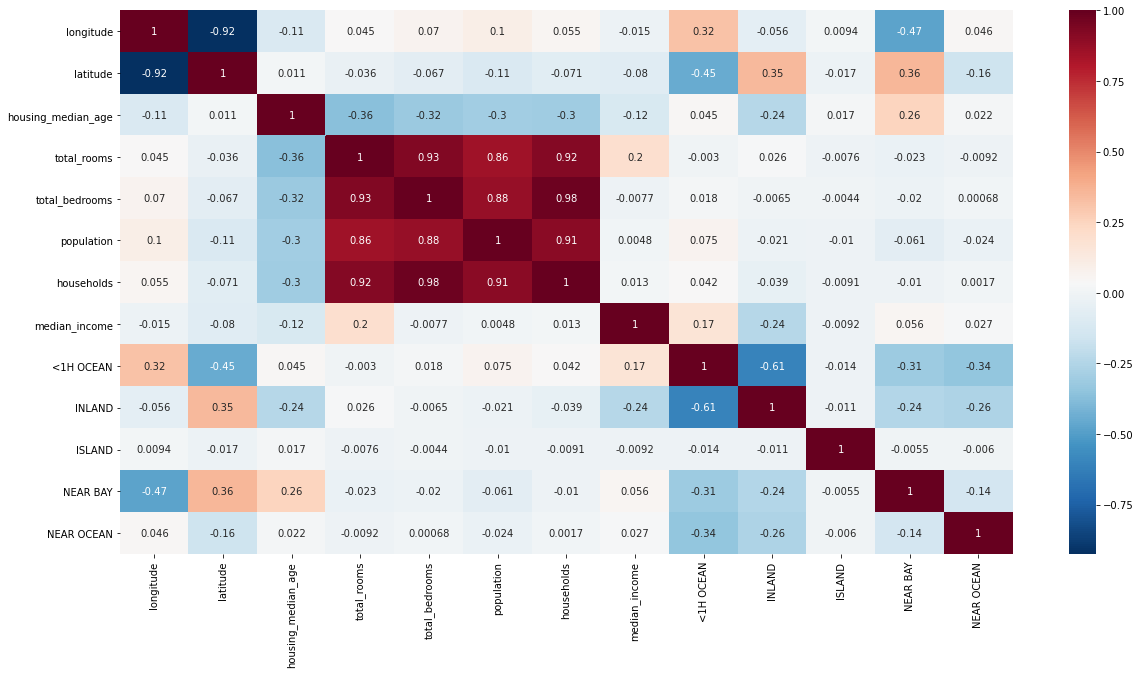

In [53]:
# first we build a matrix that contains the Pearson Correlation Coefficient (PCC) between features with reference to the labels
corr_matrix_feats = home_data.drop(columns=["median_house_value"]).corr()

# next, we isolate the feature column in the matrix that corresponds to the labels
plt.figure(figsize=(20, 10))

# then generate a heatmap to see the correlations of features against the labels => based on the data we just isolated
sns.heatmap(corr_matrix_feats, annot = True, cmap = "RdBu_r")

As stated above, once these highly correlating features have been identified, their individual correlations to the target itself will be assessed, evaluated, and compared. The feature with the lowest correlation to the label out of the two will be dropped. The essential reasoning behind this is that the dropped feature would not contribute anyting to the training data that the other feature could not. It can therefore be ruled out as redundant and dropped in order to reduce 'noise' in the data. 

<AxesSubplot:>

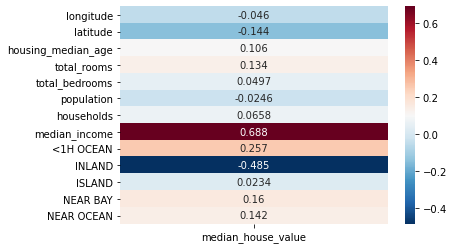

In [54]:
# first we build a matrix that contains the Pearson Correlation Coefficient (PCC) between features with reference to the labels
corr_matrix = home_data.corr()

# next, we isolate the feature column in the matrix that corresponds to the labels
corr_matrix_labels = corr_matrix[["median_house_value"]].drop(labels=["median_house_value"])

# then generate a heatmap to see the correlations of features against the labels => based on the data we just isolated
sns.heatmap(corr_matrix_labels, annot = True, fmt="0.3", cmap = "RdBu_r")

In the following section, redundant features are identified, and removed from the training set.

## Prepare the data to better expose the underlying data patterns to Machine Learning algorithms [20]

#### hint!
- remove the corresponding districts.
- remember to deal with th NA's (you can as well do this before now)
- Scale, Normalize, transform some features (e.g., median income can be put into categroies).
- Set the values to some value (zero, the mean, the median, etc.).


#### Remove Features with High Feature to Feature Correlarion

Obtain features with their scores

In [55]:
scores = corr_matrix_labels.reset_index()

Order the scores in descending order

In [56]:
scores_ordered = scores.reindex(scores["median_house_value"].abs().sort_values(ascending=False).index)

Selecting best features based on scores

In [57]:
scores_ordered = scores_ordered[:10]

Assess the Correlations and decise on which Redundant Columns to drop => pass string names into list

In [58]:
redundancies = ['longitude','total_rooms','total_bedrooms','population']

Get the ordered feature names

In [59]:
features_ordered = list(scores_ordered["index"])

Using error handling to remove redundancies from features, otherwise errors may pop up if the feature is not in the dataset due to split decision making that could potentially occur above.

In [60]:
for item in redundancies:
    try:
        features_ordered.remove(item)
    except:
        pass

Gather all those cleaned features into a dataframe

In [61]:
features_df = home_data[features_ordered]

Lets bring everything together => just to make sure our features and targets are still on the same page

In [62]:
home_cleaned = features_df.join(home_data["median_house_value"])

## Transforming Skewed Data

In order to assess the distribution curves of the all of the columns, histograms would provide the necessary information from which the necessary insights can be derived, which could then be used to consider features which need to be transformed based on the direction of their skewing. Note that the One-Hot Encoded columns are binary in terms of their values, and are thus excluded from the assessment, as they cannot be plotted on histograms, and they will display no skewing. They can be evaluated based only on their correlations as illustrated above.


Distribution Curve : longitude



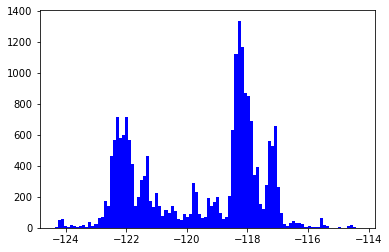


Distribution Curve : latitude



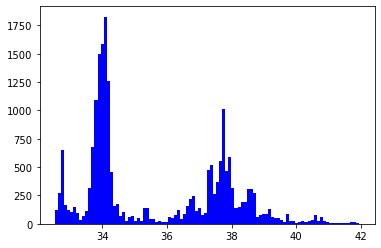


Distribution Curve : housing_median_age



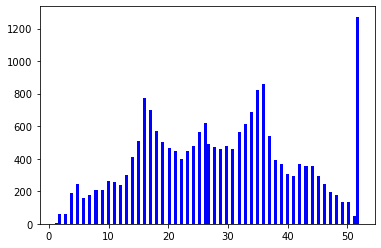


Distribution Curve : total_rooms



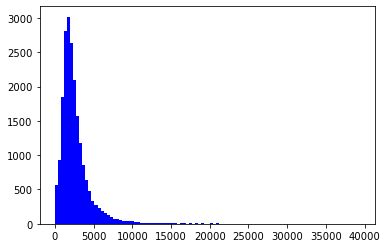


Distribution Curve : total_bedrooms



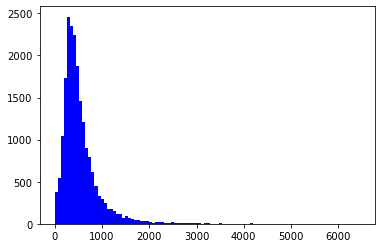


Distribution Curve : population



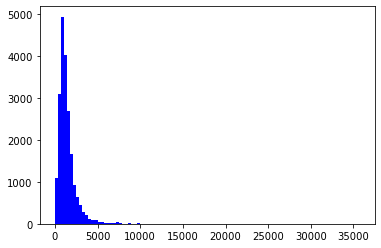


Distribution Curve : households



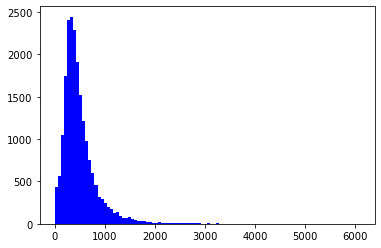


Distribution Curve : median_income



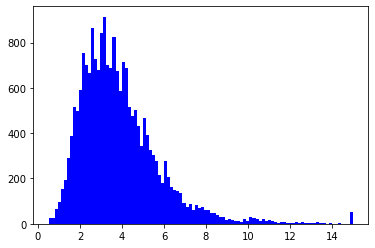


Distribution Curve : median_house_value



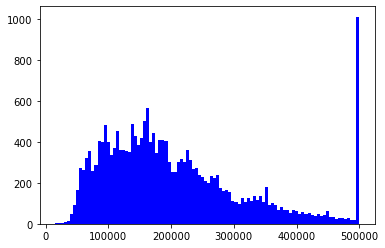


Distribution Curve : <1H OCEAN



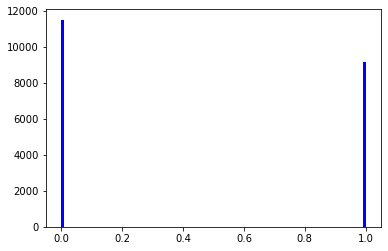


Distribution Curve : INLAND



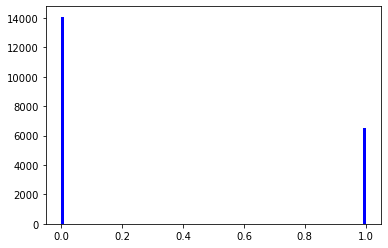


Distribution Curve : ISLAND



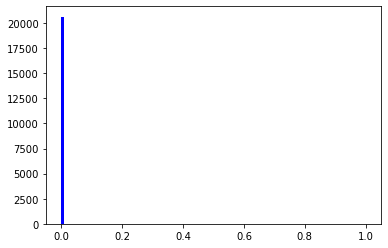


Distribution Curve : NEAR BAY



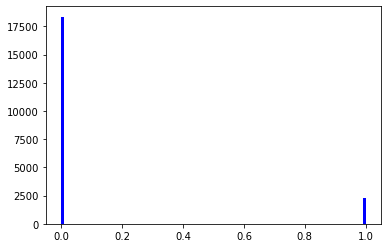


Distribution Curve : NEAR OCEAN



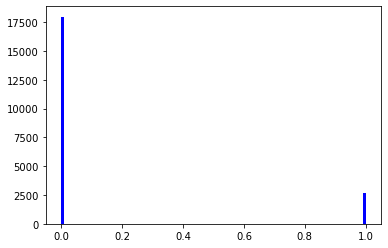

In [63]:
for column in home_data.columns:
    print(f"\nDistribution Curve : {column}\n")
    plt.hist(home_data[column], bins = 100,color='b')
    plt.show() 

#### Natural Log Transformation for Right Skewed Data

Throughout assessment of the feature data dispersions and distributions, it can be observed that several features display severely _Right-Skewed Curves_. Skewed data is an indicator that outliers could damage the data, which would ultimately lead to negatively affected performances, especially in regression-based learning algorithms. In an attempt to combat this, a numerical data transformation technique known as Log Transformation was applied to the relevant features. The ultimate aim of this was to combat the right-skewed distributions by bringing them closer to normal distributions individually.

The approach was considered on the basis of the feature data in question being right skewed, positive, i.e. greater than zero, and non-parametric. If any one of these three conditions were not to be met, performing Natural Log Transformation on the features could lead have potentially devastating effects on the integrity of the data.

The acutely right skewed features that were identified can be viewed below, in red histograms.


Right-Skewed Distribution for Feature : total_rooms



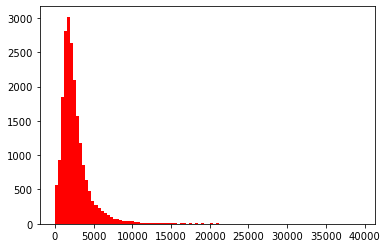


Right-Skewed Distribution for Feature : population



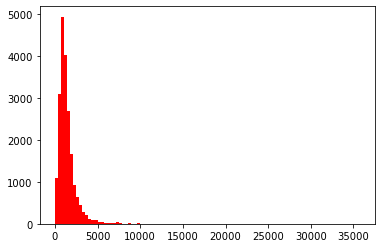


Right-Skewed Distribution for Feature : households



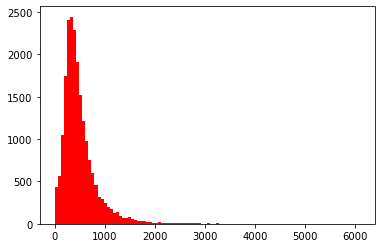


Right-Skewed Distribution for Feature : median_income



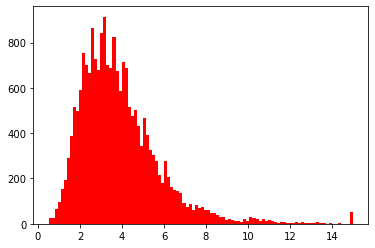

In [64]:
for column in ['total_rooms','population','households','median_income']:
    print(f"\nRight-Skewed Distribution for Feature : {column}\n")
    plt.hist(home_data[column], bins = 100,color='r')
    plt.show()   

Replace the appropriate features with it's Natural Log Transformed self:

In [65]:
# for column in ['total_rooms','population','households','median_income']:
#     home_data[column] =  np.log(home_data[column])

Then to display the effects of the transformation on the right skewed distributions:


Log Transformed Distribution for Feature : total_rooms



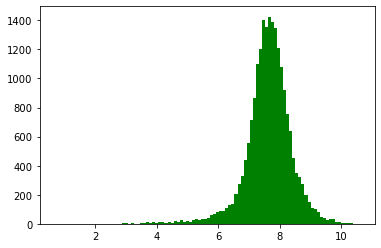


Log Transformed Distribution for Feature : population



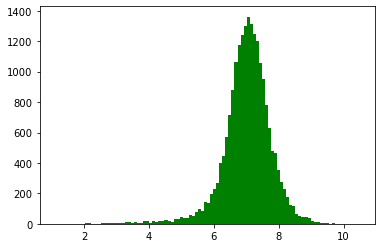


Log Transformed Distribution for Feature : households



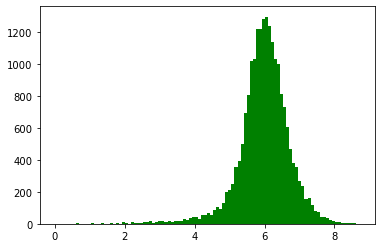


Log Transformed Distribution for Feature : median_income



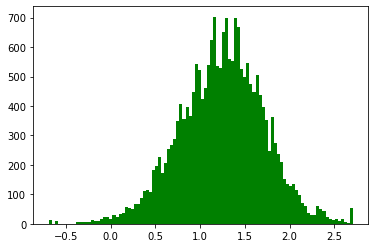

In [66]:
for column in ['total_rooms','population','households','median_income']:
    print(f"\nLog Transformed Distribution for Feature : {column}\n")
    plt.hist(np.log(home_data[column]), bins = 100,color='g')
    plt.show()  

As can be seen, the Natural Log successfully transformed the Right-Skewed Curved feature distributions into more symmetrically shaped Normal Distribution Curves. Note firstly that, the normalisation of the curve is ot to be confused with the normalisation or centering of the data, this will be done using Z-Score Normalization, which will take place in the individual model pipelines, by making use of the StandardScaler, more on that later. Secondly as stated above, Natural Log Transformation would _not_ work on features with left skewed distributions. For left-skewed data, one could opt for Square Transformation.

#### Square Transformation for Left-Skewed Distributions

Since the Natural Log Transformation Technique cannot be used on Left-Skewed Distributed data, another technique would need to be used. Enter the Square Transformation Technique. Unfortunately (or should it be fortunately), there are no cases of Left-Skewed Features in the provided dataset. 

However, for demonstrative purposes, let's assume that there were. In order to transform a right skewed feature one would simply have to raplace the feature's values with the square root of themselves, provided that all of them are positive, as you cannot square-root a negative number. The process is simple, and could be done like this:

Using Numpy:

In [67]:
# dataframe["left_squared_feature"] = np.sqrt(dataframe["left_squared_feature"])

Using plain Python:

In [68]:
# dataframe["left_squared_feature"] = sqrt(dataframe["left_squared_feature"])

Or going completely Analog:

In [69]:
# dataframe["left_squared_feature"] = dataframe["left_squared_feature"]**0.5

There are many ways to do this, but consistancy is one of the most important pillars in programming, and in any endeavour for that matter. Best practice would be to choose a specific method and to commit. Personally, I always use Numpy for this class of operations.

## Finally, pulling all the above strings together

#### Defining the Features & Labels

In [70]:
features = home_cleaned.drop(columns=["median_house_value"])
labels = home_cleaned["median_house_value"]

#### Splitting the data into Training & Testing Sets forn Linear Regression. Classification comes later.

In [71]:
x_train_lin, x_test_lin, y_train_lin, y_test_lin = train_test_split(features, labels, train_size = 0.80)

 ## Explore many different models (at least 3) and shortlist the best ones [20] Bonus [5]

#### hint!
- Some with cross_validation
- Tree based models
- Non- Tree based Models
- (don't worry too much about tuning here) => we did worry (Werner, Zandrei : 2022/5/6 @ 22:09)

# Linear Models

## Multiple-Linear Regression

In [72]:
m_liner = Pipeline([("scaler", StandardScaler()), ("m_liner", LinearRegression())]).fit(x_train_lin, y_train_lin)

#### Model Testing

In [73]:
# Getting Prediction
y_pred_lin = m_liner.predict(x_test_lin)


# Obtaining Metrics
print(f"R2 Score : {r2_score(y_test_lin,y_pred_lin)}")
print(f"Mean Squared Error : {mean_squared_error(y_test_lin, y_pred_lin)}")

R2 Score : 0.5993803683993477
Mean Squared Error : 5239884579.941694


#### Model Evaluation

# Classification Models

#### Prepping the Labels for Binary Classification

In [74]:
labels_binary = labels.apply(lambda x: 1 if x >= np.median(labels) else 0)

#### Prepping the Labels for Multi-Label Classification

Obtaining Quartiles to use as Thresholds

In [75]:
q1 = np.percentile(home_data["median_house_value"], 25)
q2 = np.percentile(home_data["median_house_value"], 50)
q3 = np.percentile(home_data["median_house_value"], 75)

Creating Splitter

In [76]:
splitter = lambda value: 4 if value >= q3 else (3 if value >= q2 and value < q3 else (2 if value >= q1 and value < q2 else (1 if value < q1 else 0)))  

Applying Splitter to Labels

In [77]:
labels_multi = labels.apply(splitter)
print(labels_multi.value_counts())

3    5165
4    5160
2    5159
1    5156
Name: median_house_value, dtype: int64


#### Re-establishing Feature & Label Splits

Binary Labels

In [78]:
x_train_bin, x_test_bin, y_train_bin, y_test_bin = train_test_split(features, labels_binary, train_size = 0.8)

Quaternary Labels

In [79]:
x_train_multi, x_test_multi, y_train_multi, y_test_multi = train_test_split(features, labels_multi, train_size = 0.8)

## Logistic Regression

In [80]:
logger = Pipeline([("scaler", StandardScaler()), ("logger", LogisticRegression())]).fit(x_train_bin, y_train_bin)

#### Logistic Regression Testing

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      2093
           1       0.80      0.83      0.81      2035

    accuracy                           0.81      4128
   macro avg       0.81      0.81      0.81      4128
weighted avg       0.81      0.81      0.81      4128

ROC AUC (Area Under Curve): 0.8098141576402446


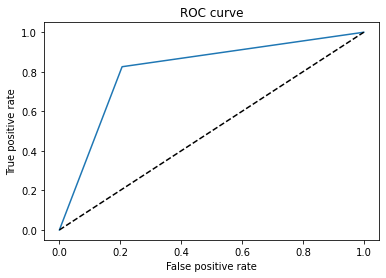

In [81]:
y_pred_logger = logger.predict(x_test_bin)
scoresheet(y_test_bin, y_pred_logger)

#### Logistic Regression Evaluation

## Decision Tree (Binary)

The Decision Tree makes use of Gini Impurity to calculate the Gain of each feature in order to select the best feature for decision splitting.

#### Buidling & Training a Decision Tree for Binary Classification

In [82]:
dessy = Pipeline([("scaler", StandardScaler()), ("dessy", DecisionTreeClassifier())]).fit(x_train_bin, y_train_bin)

#### Decision Tree (Binary) Testing

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      2093
           1       0.80      0.80      0.80      2035

    accuracy                           0.80      4128
   macro avg       0.80      0.80      0.80      4128
weighted avg       0.80      0.80      0.80      4128

ROC AUC (Area Under Curve): 0.801624345102606


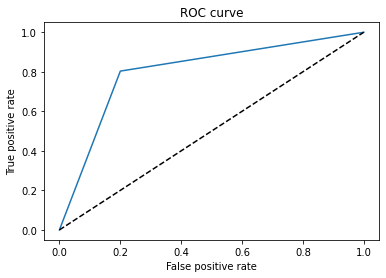

In [83]:
y_pred_dessy = dessy.predict(x_test_bin)

scoresheet(y_test_bin, y_pred_dessy)

#### Decision Tree (Binary) Evaluation

## Random Forest (Binary)

The Random Forest Algorithm basically makes use of multiple decision trees. The difference however, is that insttead of using the Gini Impurity to calculate gain in order to select features for decision splitting, this algorithm selects random subsets of features for decision splitting, after which they are replaced into the training set and new subsets are selected. This is also refered to as bagging. At the end of the day, the Random Forest uses multiple trees, and democratically selects the most popular classification result from it's trees as it's final prediction.

#### Building & Training the Random Forest using Binary Labels

In [84]:
rando = Pipeline([("scaler", StandardScaler()), ("rando", RandomForestClassifier(100))]).fit(x_train_bin, y_train_bin)

#### Random Forest (Binary) Testing

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2093
           1       0.84      0.85      0.85      2035

    accuracy                           0.85      4128
   macro avg       0.85      0.85      0.85      4128
weighted avg       0.85      0.85      0.85      4128

ROC AUC (Area Under Curve): 0.8472032080727732


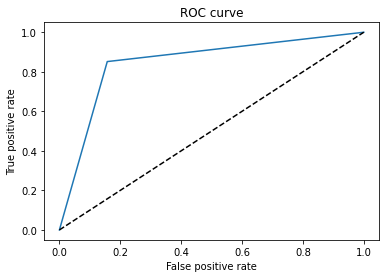

In [85]:
y_pred_rando_bin = rando.predict(x_test_bin)
scoresheet(y_test_bin, y_pred_rando_bin)

#### Random Forest (Binary) Evaluation

## Perceptron

#### Building & Training a Perceptron

In [86]:
perco = Pipeline([("scaler", StandardScaler()), ("perco", Perceptron())]).fit(x_train_bin, y_train_bin)

#### Perceptron Testing

              precision    recall  f1-score   support

           0       0.76      0.83      0.79      2093
           1       0.80      0.73      0.77      2035

    accuracy                           0.78      4128
   macro avg       0.78      0.78      0.78      4128
weighted avg       0.78      0.78      0.78      4128

ROC AUC (Area Under Curve): 0.7798875624962581


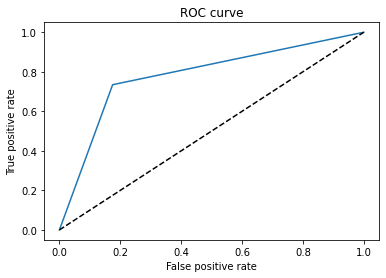

None


In [87]:
y_pred_perco = perco.predict(x_test_bin)

print(scoresheet(y_test_bin, y_pred_perco))

#### Perceptron Evaluation

## K-Nearest Neighbours

#### Building & Training a KNN Model for Binary Classification

In [88]:
kanna = Pipeline([("scaler", StandardScaler()), ("kanna", KNeighborsClassifier(n_neighbors=5))]).fit(x_train_bin, y_train_bin)

#### KNN Testing on Binary Classification

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      2093
           1       0.81      0.81      0.81      2035

    accuracy                           0.81      4128
   macro avg       0.81      0.81      0.81      4128
weighted avg       0.81      0.81      0.81      4128

ROC AUC (Area Under Curve): 0.8112480938567894


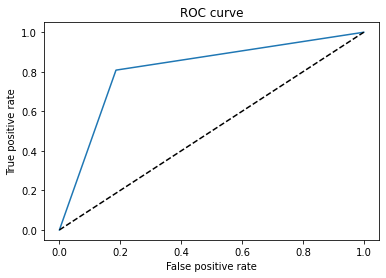

In [89]:
y_pred_kanna = kanna.predict(x_test_bin)

scoresheet(y_test_bin, y_pred_kanna)

#### KNN Evaluation on Binary Classification

## Decision Tree (Multi-Label)

#### Building & Training Decision Tree for Multi-Label Classification

In [90]:
dessy_multi = Pipeline([("scaler", StandardScaler()), ("dessy", DecisionTreeClassifier())]).fit(x_train_multi, y_train_multi)

#### Testing the Decision Tree on Multi-Label Classification

In [91]:
y_pred_dessy_multi = dessy_multi.predict(x_test_multi)

scoresheet(y_test_multi, y_pred_dessy_multi)

              precision    recall  f1-score   support

           1       0.72      0.74      0.73      1033
           2       0.48      0.47      0.47      1024
           3       0.49      0.49      0.49      1064
           4       0.67      0.66      0.66      1007

    accuracy                           0.59      4128
   macro avg       0.59      0.59      0.59      4128
weighted avg       0.59      0.59      0.59      4128



#### Evaluation of The Decision Tree on Multi-Label Classifition

## Random Forest (Multi-Label)

#### Building & Training Random Forest Model for Multi-Label Classification

In [92]:
rando_multi = Pipeline([("scaler", StandardScaler()), ("dessy", RandomForestClassifier())]).fit(x_train_multi, y_train_multi)

#### Testing the Random Forest Model on Multi-Label Classification

In [93]:
y_pred_rando_multi = rando_multi.predict(x_test_multi)

scoresheet(y_test_multi, y_pred_rando_multi)

              precision    recall  f1-score   support

           1       0.76      0.82      0.79      1033
           2       0.55      0.56      0.56      1024
           3       0.58      0.57      0.57      1064
           4       0.77      0.69      0.73      1007

    accuracy                           0.66      4128
   macro avg       0.66      0.66      0.66      4128
weighted avg       0.66      0.66      0.66      4128



#### Evaluation of The Random Forest Model on Multi-Label Classifition

## K-Nearest Neighbours (Multi-Label)

#### Building & Training K-Nearest Neighbours Model for Multi-Label Classification

In [94]:
kanna_multi = Pipeline([("scaler", StandardScaler()), ("dessy",  KNeighborsClassifier(n_neighbors=5))]).fit(x_train_multi, y_train_multi)

#### Testing the K-Nearest Neighbours Model on Multi-Label Classification

In [95]:
y_pred_kanna_multi = kanna_multi.predict(x_test_multi)

scoresheet(y_test_multi, y_pred_kanna_multi)

              precision    recall  f1-score   support

           1       0.70      0.80      0.74      1033
           2       0.45      0.52      0.48      1024
           3       0.48      0.43      0.45      1064
           4       0.73      0.60      0.66      1007

    accuracy                           0.59      4128
   macro avg       0.59      0.59      0.59      4128
weighted avg       0.59      0.59      0.58      4128



#### Evaluation of K-Nearest Neighbours Model on Multi-Label Classifition

# Stratified K-Fold Cross Validation

#### Getting all of the Models in on place        ;)

In [96]:
linear_models = {"Linear Regression": m_liner}
classifiers_binary = {"Logistic Regression": logger, "Decision Tree (Binary)": dessy, "Random Forest (Binary)": rando, "Perceptron": perco, "KNN": kanna}
classifiers_multi = {"Decision Tree (Multi-Labels)": dessy_multi, "Random Forest (Multi-Labels)": rando_multi, "KNN (Multi-Label)": kanna_multi}

#### Call the Cross Validate Function (Bottom of Script)



Test Fold 1


Fold 1 : Logistic Regression

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      2063
           1       0.75      0.79      0.77      2065

    accuracy                           0.76      4128
   macro avg       0.76      0.76      0.76      4128
weighted avg       0.76      0.76      0.76      4128

ROC AUC (Area Under Curve): 0.7606457132998208


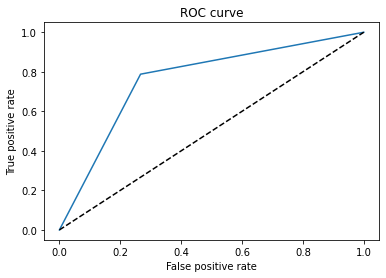


Fold 1 : Decision Tree (Binary)

              precision    recall  f1-score   support

           0       0.72      0.63      0.67      2063
           1       0.67      0.76      0.71      2065

    accuracy                           0.69      4128
   macro avg       0.70      0.69      0.69      4128
weighted avg       0.70      0.69      0.69      4128

ROC AUC (Area Under Curve): 0.6937676272477491


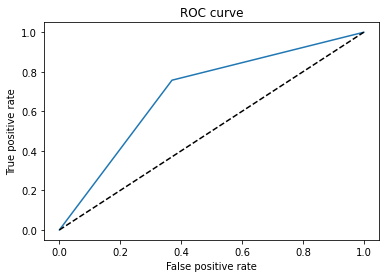


Fold 1 : Random Forest (Binary)

              precision    recall  f1-score   support

           0       0.76      0.69      0.73      2063
           1       0.72      0.78      0.75      2065

    accuracy                           0.74      4128
   macro avg       0.74      0.74      0.74      4128
weighted avg       0.74      0.74      0.74      4128

ROC AUC (Area Under Curve): 0.7390765933623545


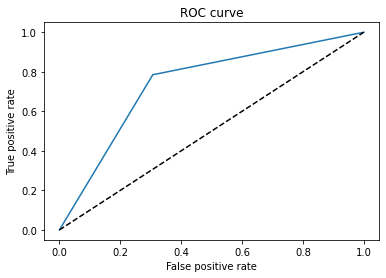


Fold 1 : Perceptron

              precision    recall  f1-score   support

           0       0.73      0.51      0.60      2063
           1       0.62      0.81      0.70      2065

    accuracy                           0.66      4128
   macro avg       0.68      0.66      0.65      4128
weighted avg       0.68      0.66      0.65      4128

ROC AUC (Area Under Curve): 0.6605398471160854


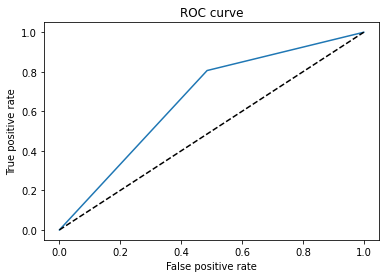


Fold 1 : KNN

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      2063
           1       0.75      0.75      0.75      2065

    accuracy                           0.75      4128
   macro avg       0.75      0.75      0.75      4128
weighted avg       0.75      0.75      0.75      4128

ROC AUC (Area Under Curve): 0.7490323572596386


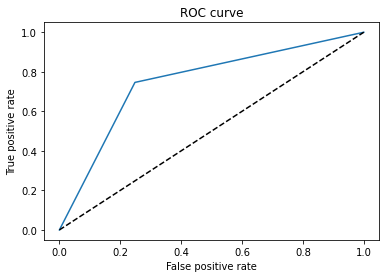



Test Fold 2


Fold 2 : Logistic Regression

              precision    recall  f1-score   support

           0       0.78      0.68      0.73      2063
           1       0.72      0.81      0.76      2065

    accuracy                           0.75      4128
   macro avg       0.75      0.75      0.74      4128
weighted avg       0.75      0.75      0.74      4128

ROC AUC (Area Under Curve): 0.7453665939374591


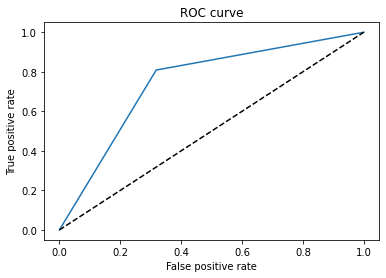


Fold 2 : Decision Tree (Binary)

              precision    recall  f1-score   support

           0       0.64      0.48      0.55      2063
           1       0.58      0.73      0.65      2065

    accuracy                           0.60      4128
   macro avg       0.61      0.60      0.60      4128
weighted avg       0.61      0.60      0.60      4128

ROC AUC (Area Under Curve): 0.6028953579673693


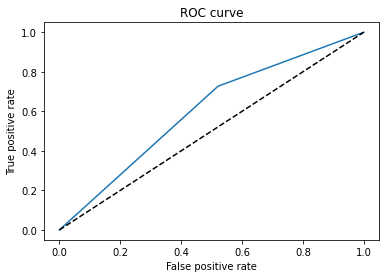


Fold 2 : Random Forest (Binary)

              precision    recall  f1-score   support

           0       0.63      0.48      0.55      2063
           1       0.58      0.72      0.64      2065

    accuracy                           0.60      4128
   macro avg       0.61      0.60      0.60      4128
weighted avg       0.61      0.60      0.60      4128

ROC AUC (Area Under Curve): 0.6012018511324277


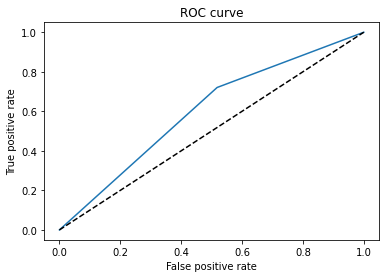


Fold 2 : Perceptron

              precision    recall  f1-score   support

           0       0.57      1.00      0.73      2063
           1       0.99      0.25      0.40      2065

    accuracy                           0.62      4128
   macro avg       0.78      0.62      0.56      4128
weighted avg       0.78      0.62      0.56      4128

ROC AUC (Area Under Curve): 0.6232438478484634


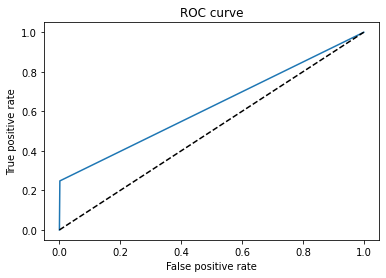


Fold 2 : KNN

              precision    recall  f1-score   support

           0       0.64      0.47      0.54      2063
           1       0.58      0.73      0.65      2065

    accuracy                           0.60      4128
   macro avg       0.61      0.60      0.60      4128
weighted avg       0.61      0.60      0.60      4128

ROC AUC (Area Under Curve): 0.6026511145878202


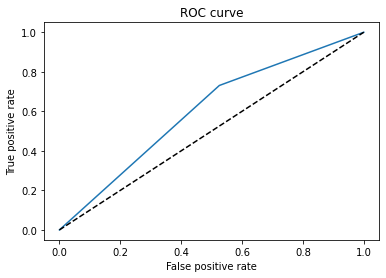



Test Fold 3


Fold 3 : Logistic Regression

              precision    recall  f1-score   support

           0       0.87      0.75      0.80      2063
           1       0.78      0.88      0.83      2065

    accuracy                           0.81      4128
   macro avg       0.82      0.81      0.81      4128
weighted avg       0.82      0.81      0.81      4128

ROC AUC (Area Under Curve): 0.8146465043619919


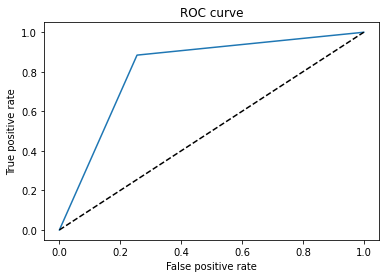


Fold 3 : Decision Tree (Binary)

              precision    recall  f1-score   support

           0       0.79      0.52      0.63      2063
           1       0.64      0.87      0.74      2065

    accuracy                           0.69      4128
   macro avg       0.72      0.69      0.68      4128
weighted avg       0.72      0.69      0.68      4128

ROC AUC (Area Under Curve): 0.6917761223634684


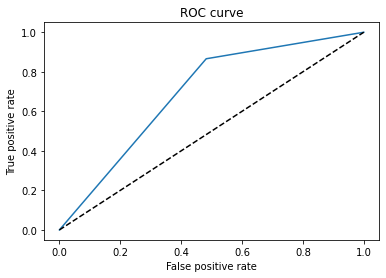


Fold 3 : Random Forest (Binary)

              precision    recall  f1-score   support

           0       0.86      0.63      0.73      2063
           1       0.71      0.90      0.79      2065

    accuracy                           0.77      4128
   macro avg       0.79      0.77      0.76      4128
weighted avg       0.79      0.77      0.76      4128

ROC AUC (Area Under Curve): 0.7656813991237285


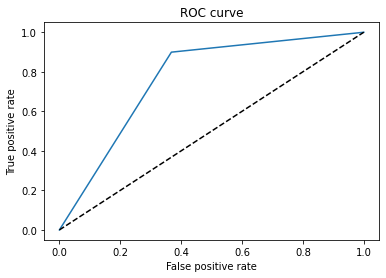


Fold 3 : Perceptron

              precision    recall  f1-score   support

           0       0.82      0.45      0.58      2063
           1       0.62      0.90      0.73      2065

    accuracy                           0.67      4128
   macro avg       0.72      0.67      0.66      4128
weighted avg       0.72      0.67      0.66      4128

ROC AUC (Area Under Curve): 0.6743093757298839


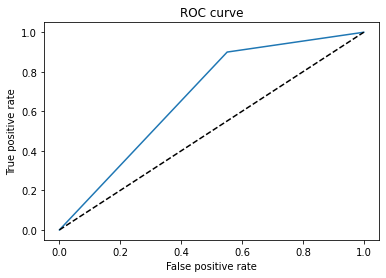


Fold 3 : KNN

              precision    recall  f1-score   support

           0       0.86      0.68      0.76      2063
           1       0.73      0.89      0.80      2065

    accuracy                           0.78      4128
   macro avg       0.79      0.78      0.78      4128
weighted avg       0.79      0.78      0.78      4128

ROC AUC (Area Under Curve): 0.7821685901370744


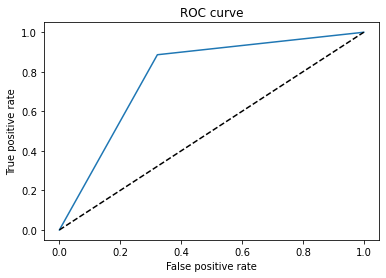



Test Fold 4


Fold 4 : Logistic Regression

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      2063
           1       0.75      0.78      0.77      2065

    accuracy                           0.76      4128
   macro avg       0.76      0.76      0.76      4128
weighted avg       0.76      0.76      0.76      4128

ROC AUC (Area Under Curve): 0.7623441496022976


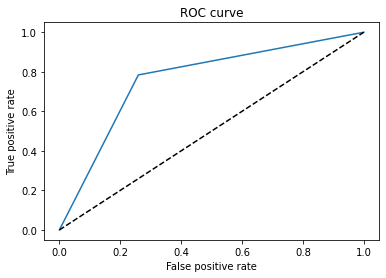


Fold 4 : Decision Tree (Binary)

              precision    recall  f1-score   support

           0       0.61      0.85      0.71      2063
           1       0.75      0.46      0.57      2065

    accuracy                           0.65      4128
   macro avg       0.68      0.65      0.64      4128
weighted avg       0.68      0.65      0.64      4128

ROC AUC (Area Under Curve): 0.6548887994281818


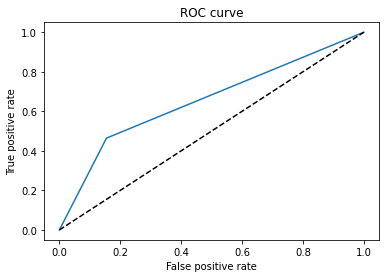


Fold 4 : Random Forest (Binary)

              precision    recall  f1-score   support

           0       0.67      0.74      0.70      2063
           1       0.71      0.63      0.67      2065

    accuracy                           0.69      4128
   macro avg       0.69      0.69      0.68      4128
weighted avg       0.69      0.69      0.68      4128

ROC AUC (Area Under Curve): 0.6855891711335075


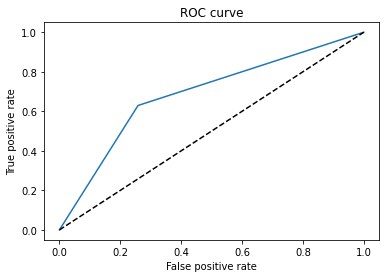


Fold 4 : Perceptron

              precision    recall  f1-score   support

           0       0.77      0.57      0.66      2063
           1       0.66      0.83      0.74      2065

    accuracy                           0.70      4128
   macro avg       0.72      0.70      0.70      4128
weighted avg       0.72      0.70      0.70      4128

ROC AUC (Area Under Curve): 0.7022149740792165


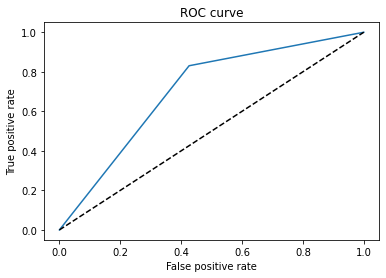


Fold 4 : KNN

              precision    recall  f1-score   support

           0       0.75      0.78      0.76      2063
           1       0.77      0.73      0.75      2065

    accuracy                           0.76      4128
   macro avg       0.76      0.76      0.76      4128
weighted avg       0.76      0.76      0.76      4128

ROC AUC (Area Under Curve): 0.7577638526840362


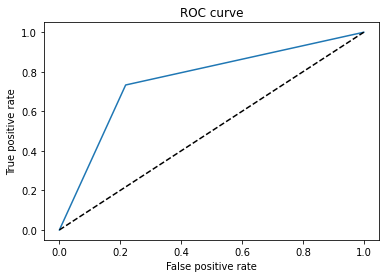



Test Fold 5


Fold 5 : Logistic Regression

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2063
           1       0.85      0.85      0.85      2065

    accuracy                           0.85      4128
   macro avg       0.85      0.85      0.85      4128
weighted avg       0.85      0.85      0.85      4128

ROC AUC (Area Under Curve): 0.8469001278140511


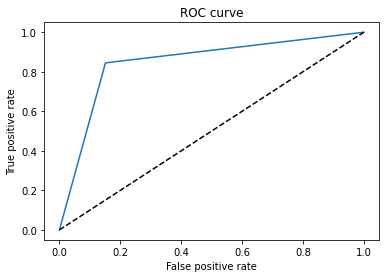


Fold 5 : Decision Tree (Binary)

              precision    recall  f1-score   support

           0       0.82      0.71      0.76      2063
           1       0.75      0.85      0.79      2065

    accuracy                           0.78      4128
   macro avg       0.78      0.78      0.78      4128
weighted avg       0.78      0.78      0.78      4128

ROC AUC (Area Under Curve): 0.7792801568979096


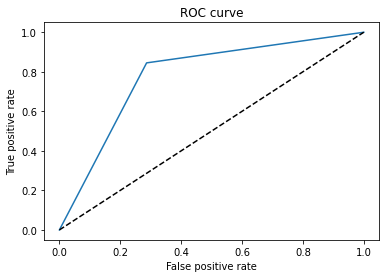


Fold 5 : Random Forest (Binary)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2063
           1       0.82      0.86      0.84      2065

    accuracy                           0.83      4128
   macro avg       0.83      0.83      0.83      4128
weighted avg       0.83      0.83      0.83      4128

ROC AUC (Area Under Curve): 0.8342917235413765


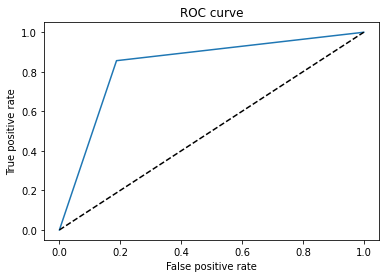


Fold 5 : Perceptron

              precision    recall  f1-score   support

           0       0.75      0.78      0.76      2063
           1       0.77      0.74      0.75      2065

    accuracy                           0.76      4128
   macro avg       0.76      0.76      0.76      4128
weighted avg       0.76      0.76      0.76      4128

ROC AUC (Area Under Curve): 0.7587304977940632


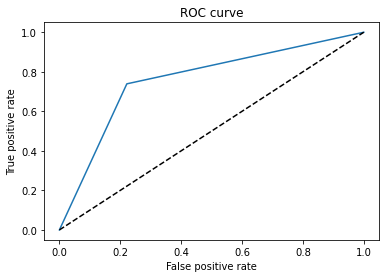


Fold 5 : KNN

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      2063
           1       0.82      0.85      0.83      2065

    accuracy                           0.83      4128
   macro avg       0.83      0.83      0.83      4128
weighted avg       0.83      0.83      0.83      4128

ROC AUC (Area Under Curve): 0.8279944461332435


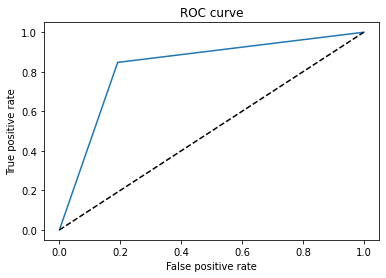

In [97]:
KFold_Cross_Validate(classifiers_binary, features, labels_binary)


#### Evaluate & Report on Cross Validation

 ## Fine-tune your models [10] BONUS [10]

#### hint!
- We manually tuned our model in the class (this is not efficient)

try:
- GridSearchCV from sklearn (self-improvement)
- esemble methods
- evaluate your models on the test set

# Implementing GridSearchCV

## Linear Models

#### Set the Parameters for Linear Regression Test

In [98]:
linear_parameters = {'fit_intercept':[True, False], 'copy_X':[True, False]}

#### Build, Prime & Fit GridSearchCV

In [99]:
linear_grid = GridSearchCV(LinearRegression(), linear_parameters).fit(x_train_lin, y_train_lin)

#### Let's Print & Evaluate the Results

In [100]:
print(f"Best r2 Score : {linear_grid.best_score_}" )
print(f"Best Mean Squared Error : {np.mean((linear_grid.predict(x_test_lin) - y_test_lin) ** 2)}")

Best r2 Score : 0.6037735975574969
Best Mean Squared Error : 5239884579.941715


#### Observations

## Binary Classification Models

#### Create the Dictionary that holds all of the Models, Names & Parameters

In [101]:
binary_model_parameters = {
    LogisticRegression(): ["Logistic Regression", {}],
    DecisionTreeClassifier(): ["Decision Tree (Binary)", {}],
    RandomForestClassifier(): ["Random Forest Classifier (Binary)", {}],
    Perceptron(): ["Perceptron", {}],
    KNeighborsClassifier(): ["K-Nearest Neighbours (Binary)", {}]
}

#### Build & Run GridSearchCV for all Binary Classifiers



Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      2093
           1       0.80      0.82      0.81      2035

    accuracy                           0.81      4128
   macro avg       0.81      0.81      0.81      4128
weighted avg       0.81      0.81      0.81      4128

ROC AUC (Area Under Curve): 0.8090770569031438


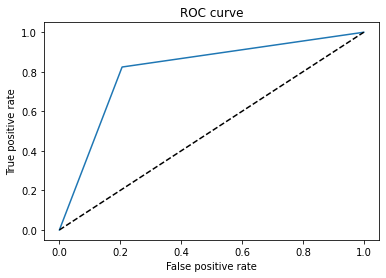



Decision Tree (Binary)
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2093
           1       0.79      0.80      0.79      2035

    accuracy                           0.80      4128
   macro avg       0.80      0.80      0.80      4128
weighted avg       0.80      0.80      0.80      4128

ROC AUC (Area Under Curve): 0.7953042257390082


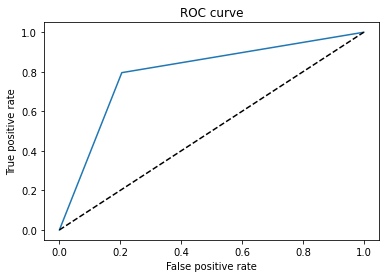



Random Forest Classifier (Binary)
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2093
           1       0.83      0.84      0.84      2035

    accuracy                           0.84      4128
   macro avg       0.84      0.84      0.84      4128
weighted avg       0.84      0.84      0.84      4128

ROC AUC (Area Under Curve): 0.8391972305015784


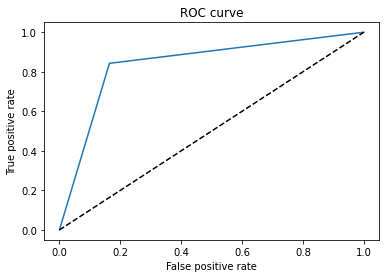



Perceptron
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      2093
           1       0.81      0.73      0.77      2035

    accuracy                           0.78      4128
   macro avg       0.78      0.78      0.78      4128
weighted avg       0.78      0.78      0.78      4128

ROC AUC (Area Under Curve): 0.7807886590495287


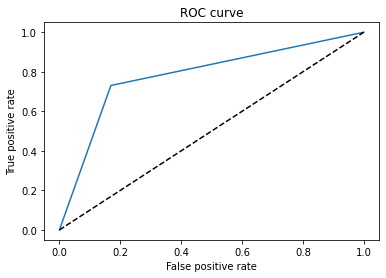



K-Nearest Neighbours (Binary)
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      2093
           1       0.81      0.81      0.81      2035

    accuracy                           0.82      4128
   macro avg       0.82      0.82      0.82      4128
weighted avg       0.82      0.82      0.82      4128

ROC AUC (Area Under Curve): 0.8150975933584629


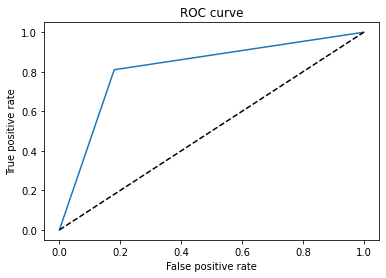

In [102]:
generate_GridSearchCV_class(binary_model_parameters, x_train_bin, x_test_bin, y_train_bin, y_test_bin)

#### Obervations & Evaluation

## Multi-Label Classification Models

#### Create the Dictionary that holds all of the Models, Names & Parameters

In [103]:
multi_model_parameters = {
    DecisionTreeClassifier(): ["Decision Tree (Multi-Label)", {}],
    RandomForestClassifier(): ["Random Forest Classifier (Multi-Label)", {}],
    KNeighborsClassifier(): ["K-Nearest Neighbours (Multi-Label)", {}]
}

#### Build & Run GridSearchCV for all Binary Classifiers



Decision Tree (Multi-Label)
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      2093
           1       0.79      0.80      0.79      2035

    accuracy                           0.79      4128
   macro avg       0.79      0.79      0.79      4128
weighted avg       0.79      0.79      0.79      4128

ROC AUC (Area Under Curve): 0.7924375272201359


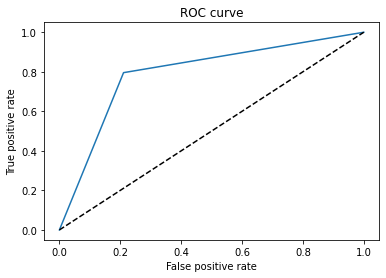



Random Forest Classifier (Multi-Label)
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2093
           1       0.83      0.84      0.84      2035

    accuracy                           0.84      4128
   macro avg       0.84      0.84      0.84      4128
weighted avg       0.84      0.84      0.84      4128

ROC AUC (Area Under Curve): 0.8382484730310817


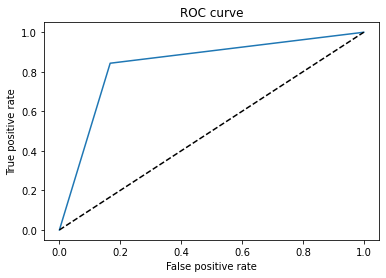



K-Nearest Neighbours (Multi-Label)
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      2093
           1       0.81      0.81      0.81      2035

    accuracy                           0.82      4128
   macro avg       0.82      0.82      0.82      4128
weighted avg       0.82      0.82      0.82      4128

ROC AUC (Area Under Curve): 0.8150975933584629


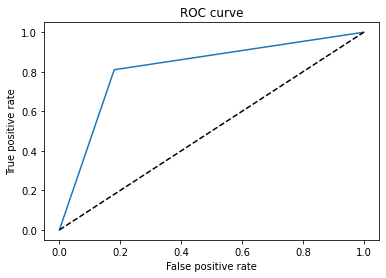

In [104]:
generate_GridSearchCV_class(multi_model_parameters, x_train_bin, x_test_bin, y_train_bin, y_test_bin)

## Present your solution [20].

#### hint!
- you do not need machine learning knowledge to write a report
- Report your choosen solution and justify it

In [105]:
# _your Report here_

### ADVISE: Let your objective not be to obtain marks but to understand, experiment and experience! 

### Congratulations! You have achieved a lot if you have completed this project deligently

# Functions

#### Score Sheet Printer

In [106]:
def scoresheet(y_test, y_pred):
    print(classification_report(y_test, y_pred))    
    
    try:
        print(f"ROC AUC (Area Under Curve): {roc_auc_score(y_test, y_pred)}")
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        plt.plot(fpr, tpr)
        plt.plot(fpr, fpr, linestyle = '--', color = 'k')
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.title('ROC curve')
        plt.show()
        
    except: pass

#### Generate GridSearchCV for Classifier Models 

In [107]:
def generate_GridSearchCV_class(mega_dict, x_train, x_test, y_train, y_test):
    for model, name_param in mega_dict.items():
    
        # Normalise X's    
        x_train = StandardScaler().fit_transform(x_train)
        x_test = StandardScaler().fit_transform(x_test)

        # Print Names
        print("\n\n==================================================")
        print(name_param[0])
        print("==================================================")

        # Build GridSearchCV on model
        class_grid = GridSearchCV(model, name_param[1]).fit(x_train, y_train)
        y_pred_class = class_grid.predict(x_test)

        # Print Score Sheet for model
        scoresheet(y_test, y_pred_class)
    

#### Cross Validator

In [109]:
def KFold_Cross_Validate(models, features, labels):
    stratkf_cross = StratifiedKFold(n_splits = 5)

    iteration = 1
    for train_index, test_index in stratkf_cross.split(features, labels):

        print("\n\n========================================================")
        print(f"Test Fold {iteration}")
        print("========================================================\n")      

        x_train, x_test = features.iloc[train_index, :], features.iloc[test_index, :]
        y_train, y_test = labels[train_index], labels[test_index]

        for name, model in models.items():

            print(f"\nFold {iteration} : {name}\n")

            y_pred = model.fit(x_train, y_train).predict(x_test)
            scoresheet(y_test, y_pred)


        iteration+=1
 